In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("imdb_top_250_movies.csv")

In [8]:
df

,Title,Year,Duration,Content Rating,Rating,Votes
0,The Shawshank Redemption,1994,2h 22m,R,9.3,(3.1M)
1,The Godfather,1972,2h 55m,R,9.2,(2.2M)
2,The Dark Knight,2008,2h 32m,PG-13,9.1,(3.1M)
3,The Godfather Part II,1974,3h 22m,R,9.0,(1.5M)
4,12 Angry Men,1957,1h 36m,Approved,9.0,(947K)
...,...,...,...,...,...,...
245,Demon Slayer: Kimetsu no Yaiba - The Movie: Mu...,2020,1h 57m,TV-MA,8.2,(90K)
246,Into the Wild,2007,2h 28m,R,8.0,(685K)
247,The Help,2011,2h 26m,PG-13,8.1,(519K)
248,Lost Ladies,2023,2h 2m,TV-14,8.3,(54K)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           250 non-null    object 
 1   Year            250 non-null    int64  
 2   Duration        250 non-null    object 
 3   Content Rating  245 non-null    object 
 4   Rating          250 non-null    float64
 5   Votes           250 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 11.8+ KB


### Step 2 cleaning fully by creating numeric versions of Duration and Votes, since those are still object

In [10]:

# Convert Duration → minutes
import re

def duration_to_minutes(x):
    match = re.match(r"(?:(\d+)h)?\s*(?:(\d+)m)?", str(x))
    if not match:
        return None
    hours = int(match.group(1)) if match.group(1) else 0
    minutes = int(match.group(2)) if match.group(2) else 0
    return hours * 60 + minutes

df["Duration_min"] = df["Duration"].apply(duration_to_minutes)


In [11]:
df[["Duration", "Duration_min"]].head()


,Duration,Duration_min
0,2h 22m,142
1,2h 55m,175
2,2h 32m,152
3,3h 22m,202
4,1h 36m,96


In [13]:
# onvert Votes → integer
def parse_votes(x):
    if pd.isnull(x): return None
    x = str(x).replace("(", "").replace(")", "").strip()
    if "M" in x:
        return int(float(x.replace("M", "")) * 1_000_000)
    elif "K" in x:
        return int(float(x.replace("K", "")) * 1_000)
    else:
        return int(x)

df["Votes_num"] = df["Votes"].apply(parse_votes)


In [14]:
df[["Votes", "Votes_num"]].head()


,Votes,Votes_num
0,(3.1M),3100000
1,(2.2M),2200000
2,(3.1M),3100000
3,(1.5M),1500000
4,(947K),947000


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           250 non-null    object 
 1   Year            250 non-null    int64  
 2   Duration        250 non-null    object 
 3   Content Rating  245 non-null    object 
 4   Rating          250 non-null    float64
 5   Votes           250 non-null    object 
 6   Duration_min    250 non-null    int64  
 7   Votes_num       250 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 15.8+ KB


In [16]:
# check duplicates
print("Duplicates found:", df.duplicated().sum())

# drop duplicates if any
df = df.drop_duplicates()

# confirm shape
print("New shape:", df.shape)


Duplicates found: 0
New shape: (250, 8)


In [17]:
df.isnull().sum()


Title             0
Year              0
Duration          0
Content Rating    5
Rating            0
Votes             0
Duration_min      0
Votes_num         0
dtype: int64

In [18]:
# fill missing content ratings with "Unknown"
df["Content Rating"] = df["Content Rating"].fillna("Unknown")

# check again
df["Content Rating"].value_counts()


Content Rating
R            101
PG            38
PG-13         35
Not Rated     24
Approved      21
G             18
Unknown        5
Passed         5
NC-17          1
TV-MA          1
TV-14          1
Name: count, dtype: int64

## EDA Step 1: Descriptive statistics.

In [19]:
df[["Year", "Rating", "Duration_min", "Votes_num"]].describe()


,Year,Rating,Duration_min,Votes_num
count,250.000000,250.000000,250.000000,2.500000e+02
mean,1988.652000,8.309600,131.716000,7.390480e+05
std,25.467573,0.231261,35.674388,6.019550e+05
min,1921.000000,8.000000,45.000000,2.600000e+04
25%,1973.000000,8.100000,109.250000,2.382500e+05
50%,1995.500000,8.200000,127.500000,6.055000e+05
75%,2009.000000,8.400000,147.750000,1.100000e+06
max,2024.000000,9.300000,374.000000,3.100000e+06


### Visualization

### Distribution of Rating

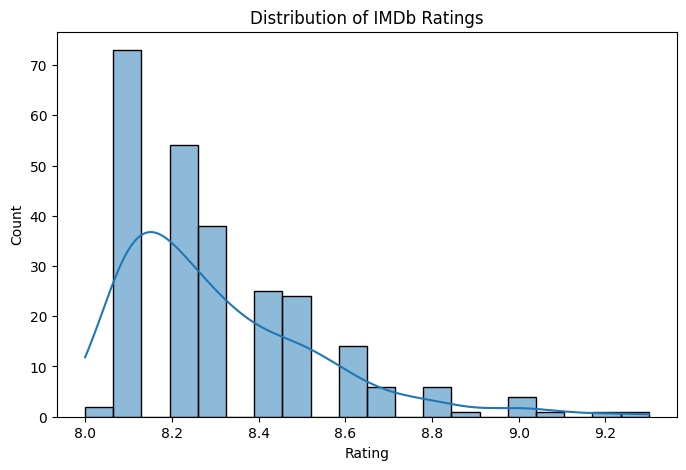

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df["Rating"], bins=20, kde=True)
plt.title("Distribution of IMDb Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

- The distribution of IMDb ratings is heavily concentrated between 8.0 and 8.3, with a clear right-skewed pattern indicating that a large number of movies have ratings in this lower range, while very few films achieve exceptionally high ratings

### Distribution of content

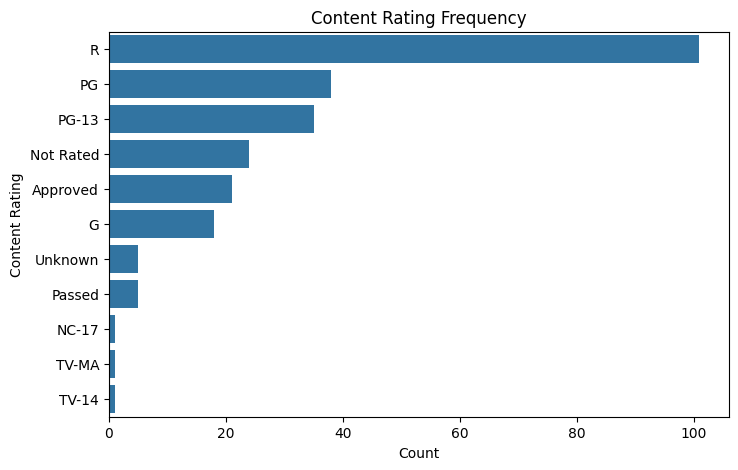

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(y="Content Rating", data=df, order=df["Content Rating"].value_counts().index)
plt.title("Content Rating Frequency")
plt.xlabel("Count")
plt.ylabel("Content Rating")
plt.show()


- The most common content rating is 'R' by a significant margin, followed by 'PG' and 'PG-13', which together represent the majority of the films 

### Vote vs Rating

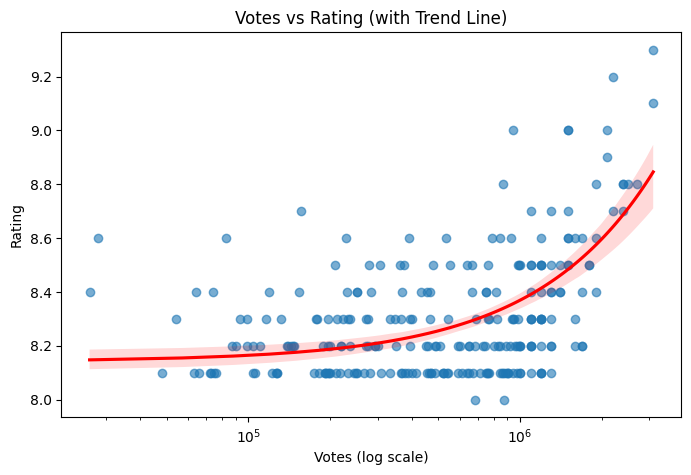

In [24]:
plt.figure(figsize=(8,5))
sns.regplot(x="Votes_num", y="Rating", data=df, scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.title("Votes vs Rating (with Trend Line)")
plt.xlabel("Votes (log scale)")
plt.ylabel("Rating")
plt.xscale("log")
plt.show()


- movies with more votes tend to have higher IMDb ratings, indicating a strong positive correlation where the most popular films are also consistently rated highly

### movie duration relates to rating

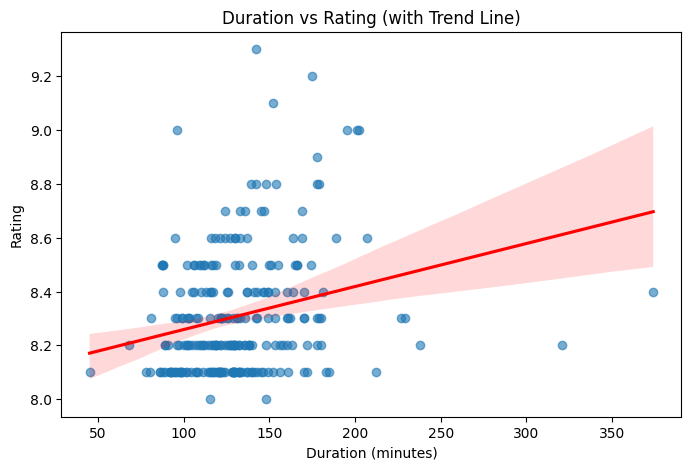

In [27]:
plt.figure(figsize=(8,5))
sns.regplot(x="Duration_min", y="Rating", data=df,
            scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.title("Duration vs Rating (with Trend Line)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Rating")
plt.show()


- there is a weak positive correlation between a movie's duration and its IMDb rating, indicating that a film's length is not a strong predictor of how highly it will be rated

#### analyze trends over years

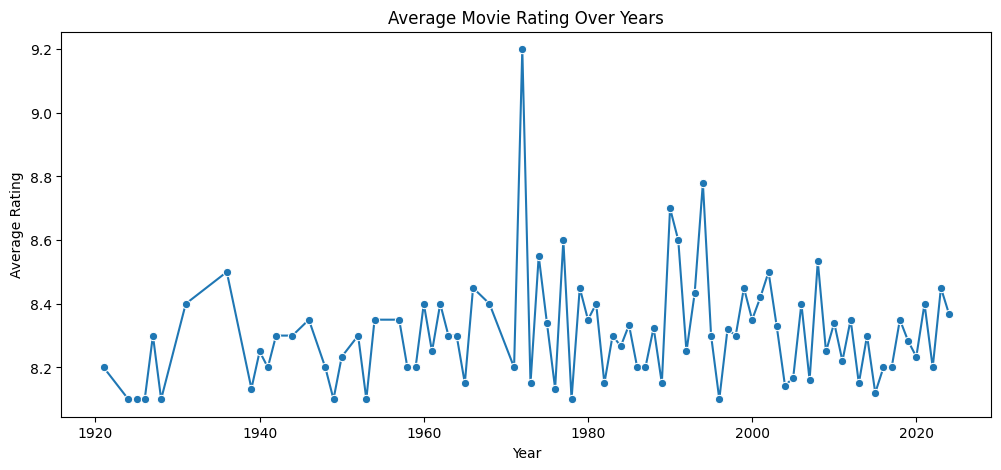

In [40]:
# calculate average rating per year
avg_rating_year = df.groupby("Year")["Rating"].mean().reset_index()

# plot line chart
plt.figure(figsize=(12,5))
sns.lineplot(x="Year", y="Rating", data=avg_rating_year, marker="o")
plt.title("Average Movie Rating Over Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()


- The average movie rating has fluctuated significantly from year to year, with no clear long-term trend, but a very notable spike in the 1970s.

### most popular movies by votes

In [41]:
# top 10 movies by votes
top_votes = df.sort_values("Votes_num", ascending=False).head(10)

# display
top_votes[["Title", "Year", "Rating", "Votes_num"]]


,Title,Year,Rating,Votes_num
0,The Shawshank Redemption,1994,9.3,3100000
2,The Dark Knight,2008,9.1,3100000
13,Inception,2010,8.8,2700000
12,Fight Club,1999,8.8,2500000
7,Pulp Fiction,1994,8.8,2400000
10,Forrest Gump,1994,8.8,2400000
17,Interstellar,2014,8.7,2400000
1,The Godfather,1972,9.2,2200000
15,The Matrix,1999,8.7,2200000
8,The Lord of the Rings: The Fellowship of the Ring,2001,8.9,2100000


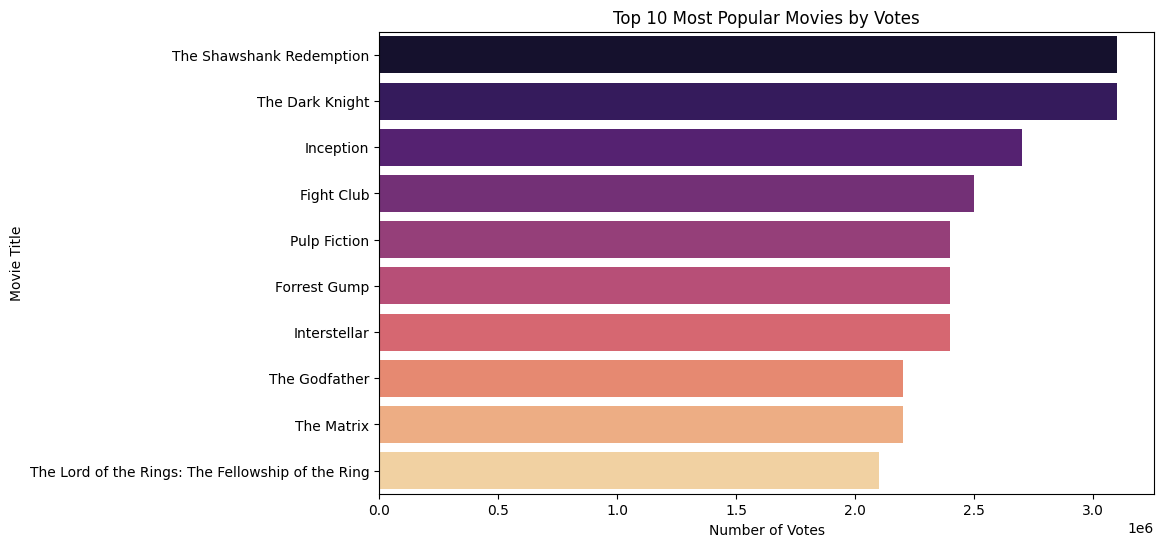

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x="Votes_num", y="Title", data=top_votes, hue="Title", dodge=False, legend=False, palette="magma")
plt.title("Top 10 Most Popular Movies by Votes")
plt.xlabel("Number of Votes")
plt.ylabel("Movie Title")
plt.show()



- The top three most-voted movies—"The Shawshank Redemption," "The Dark Knight," and "Inception"—are the clear leaders in popularity, with "The Shawshank Redemption" having a significantly higher number of votes than any other film on the list

### visualize the top 10 movies by rating

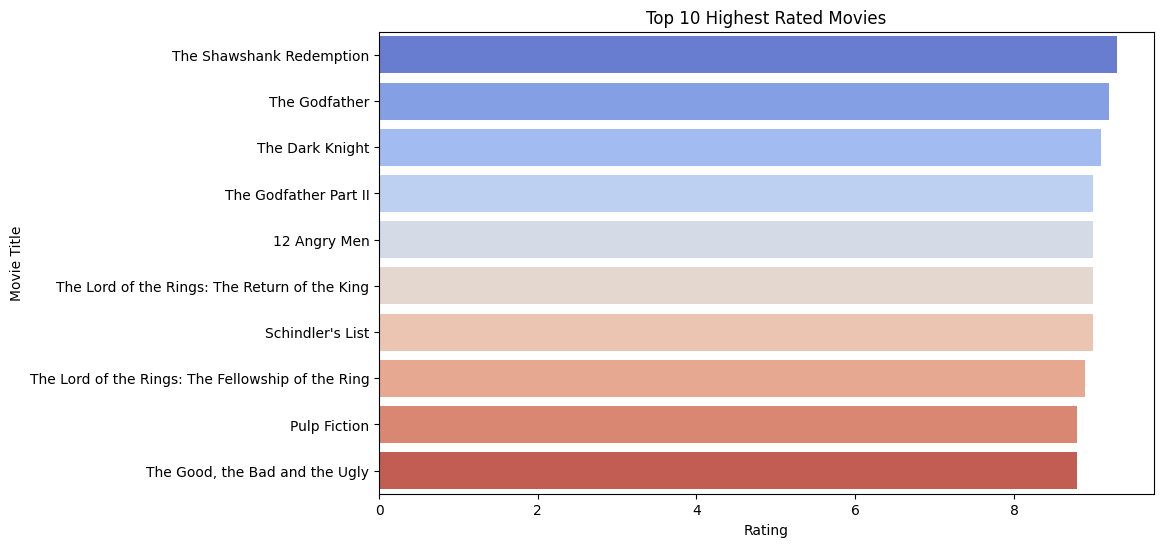

In [44]:
# top 10 movies by rating
top_rated = df.sort_values("Rating", ascending=False).head(10)

# plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x="Rating", y="Title", data=top_rated, hue="Title", dodge=False, legend=False, palette="coolwarm")
plt.title("Top 10 Highest Rated Movies")
plt.xlabel("Rating")
plt.ylabel("Movie Title")
plt.show()


- All movies on this list are rated exceptionally high, with their scores clustered in a very tight range. This indicates a strong consensus among voters on their consistent, top-tier quality

### how content rating relates to IMDb rating

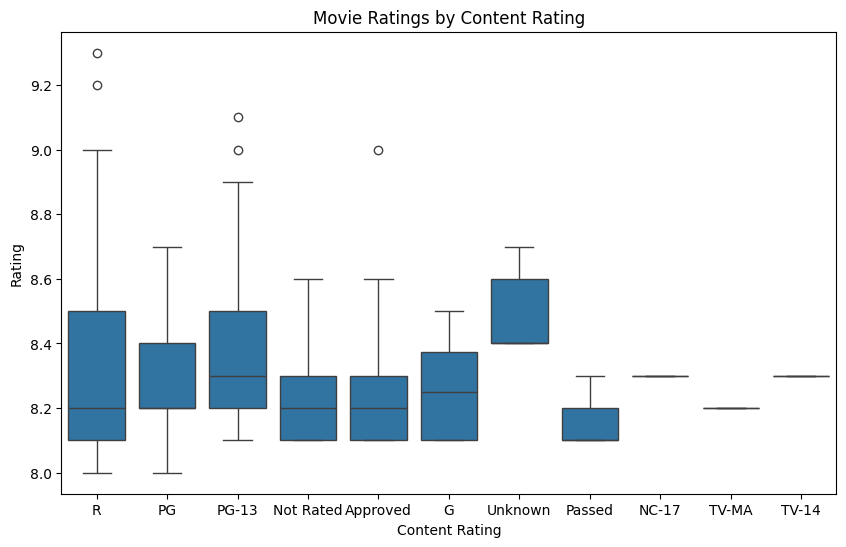

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Content Rating", y="Rating", data=df, order=df["Content Rating"].value_counts().index)
plt.title("Movie Ratings by Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Rating")
plt.show()


- The median rating is highest for the 'Unknown' category, while the 'R' and 'PG-13' ratings have the widest spread of ratings, indicating the greatest variability in film quality within those groups

### correlation analysis

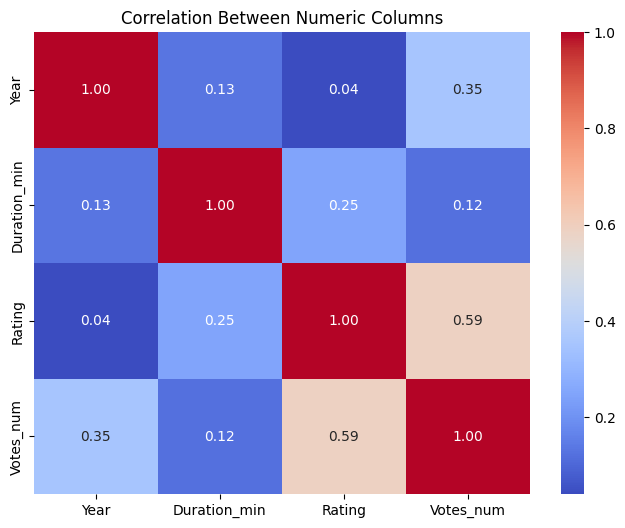

In [47]:
# correlation matrix
corr = df[["Year", "Duration_min", "Rating", "Votes_num"]].corr()

# plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numeric Columns")
plt.show()


- he correlation between two variables (e.g., Year and Rating) is the same regardless of the order. The diagonal itself shows a perfect correlation of 1.00, as each variable is perfectly correlated with itself.